## Team 17 - 9.7.6
Tianyu Liu - Dave Maser - Flynn Hopkins

### Question 9.7.6

At the end of Section 9.6.1, it is claimed that in the case of data that
is just barely linearly separable, a support vector classifier with a
small value of cost that misclassifies a couple of training observations
may perform better on test data than one with a huge value of cost
that does not misclassify any training observations. You will now
investigate this claim.

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

### Part (a)

(a) Generate two-class data with p = 2 in such a way that the classes
are just barely linearly separable.

In [2]:
## Set Seed

random.seed(1693)

In [3]:
## Create numbers uniformly distributed from -0.5 to 0.5

X1 = np.random.uniform(-10, 10, 1000)
X2 = np.random.uniform(-10, 10, 1000)

In [4]:
## Stack X1 and X2 to create X and Y Coordinates

X = np.column_stack((X1,X2))

In [5]:
## Check values

X_df = pd.DataFrame(X, columns =  ['X1', 'X2'] )
X_df[:10]

,X1,X2
0,-1.202004,-9.949336
1,1.187011,-8.406879
2,-1.680042,0.412306
3,-5.325881,-1.814169
4,0.027697,-5.931322
5,-5.638651,6.711542
6,-2.296472,8.223796
7,6.050863,-8.310809
8,-4.596723,8.658686
9,0.305898,7.887293


In [6]:
## Create a placement indicator

temp = X1-X2

## Create an empty list for y values

Y = [None] * len(temp)

In [7]:
## Check values

classX = np.column_stack((temp,Y))

Y_df = pd.DataFrame(classX, columns = ['0', '1'])
Y_df[:10]

,0,1
0,8.747332,None
1,9.59389,None
2,-2.092348,None
3,-3.511712,None
4,5.959019,None
5,-12.350193,None
6,-10.520269,None
7,14.361673,None
8,-13.255409,None
9,-7.581395,None


In [8]:
## Determine the classification

for index, j in enumerate(temp):
    if j > 0:
        Y[index] = 1
    else:
        Y[index] = 0

In [9]:
## Check Classification Values

classY = np.column_stack((temp,Y))

Y_df = pd.DataFrame(classY, columns = ['Position Indicator', 'Classification'])
Y_df[:10]

,Position Indicator,Classification
0,8.747332,1.0
1,9.593890,1.0
2,-2.092348,0.0
3,-3.511712,0.0
4,5.959019,1.0
5,-12.350193,0.0
6,-10.520269,0.0
7,14.361673,1.0
8,-13.255409,0.0
9,-7.581395,0.0


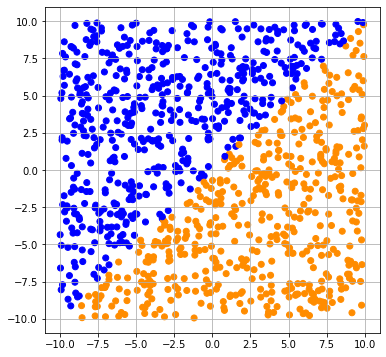

In [10]:
## Plot our points colored by class

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
plt.scatter(X1, X2, color=['blue' if c == 0 else 'darkorange' for c in Y])
plt.grid()
plt.show()

### Parts (b) and (c)

(b) Compute the cross-validation error rates for support vector
classifiers with a range of cost values. How many training errors are misclassified for each value of cost considered, and how
does this relate to the cross-validation errors obtained?

(c) Generate an appropriate test data set, and compute the test
errors corresponding to each of the values of cost considered.
Which value of cost leads to the fewest test errors, and how
does this compare to the values of cost that yield the fewest
training errors and the fewest cross-validation errors?

### Import New Libraries

In [11]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [12]:
## Set seed

random.seed(1693)

In [13]:
## Break our dataset into train and test

X_train, X_vald, y_train, y_vald = train_test_split(X, Y, test_size=0.5)

In [14]:
## Our Training Data; X1, X2, Y

classTrain = np.column_stack((X_train,y_train))
classTrain_df= pd.DataFrame(classTrain, columns = ['X1', 'X2', 'Y'])
classTrain_df[:10]

,X1,X2,Y
0,7.036081,2.480589,1.0
1,1.719316,-1.569218,1.0
2,4.312957,0.837139,1.0
3,-1.202004,-9.949336,1.0
4,5.369079,9.742914,0.0
5,-0.849765,-5.407644,1.0
6,7.819965,-3.732210,1.0
7,-8.914048,-2.969596,0.0
8,-9.026755,3.026525,0.0
9,-6.353339,-8.800474,1.0


In [15]:
## Our Validation Data

classTest = np.column_stack((X_vald,y_vald))

classTest_df = pd.DataFrame(classTest, columns = ['X1', 'X2', 'Y'])
classTest_df[:10]

,X1,X2,Y
0,-3.332685,3.736089,0.0
1,-3.132670,-3.708161,1.0
2,-3.620732,-0.211063,0.0
3,-2.439721,-7.829875,1.0
4,-5.260411,9.746088,0.0
5,-2.303097,4.814418,0.0
6,9.218193,-0.235382,1.0
7,4.293928,9.338041,0.0
8,7.652774,5.834264,1.0
9,-2.127198,3.206511,0.0


In [16]:
## Create a range of cost values

cost = [0.001, 0.01, .1, 1, 10, 100, 1000, 10000]

In [17]:
## Create dictionaries for Training, Cross Validation, and Test errors

cv_error = {}
train_error = {}
test_error= {}

In [18]:
for c in cost:
    ## fit our model with our training data
    model = svm.SVC(kernel='linear', C=c, random_state=1693)
    model.fit(X_train, y_train)
    
    ## Calculate our Cross Validation Errors
    scores = 1 - cross_val_score(model, X_train, y_train, cv=10)
    cv_error[c] = np.mean(scores)
    
    ## predict with our X_train and calculate Train error
    p = model.predict(X_train)
    train_error[c] = (len(X_train) - sum(y_train == p))/len(X_train)
    
    ## predict with our X_test and calculate test error
    p = model.predict(X_vald)
    test_error[c] = (len(X_vald) - sum(y_vald == p))/len(X_vald)

In [19]:
## Error Rates Dataframe

errors = pd.DataFrame(np.column_stack((pd.DataFrame.from_dict(cv_error.values()), pd.DataFrame.from_dict(train_error.values()), pd.DataFrame.from_dict(test_error.values()))), columns = ['CV Error', 'Train Error', 'Test Error'], index = cost)
errors.index.name = 'costs'
errors

,CV Error,Train Error,Test Error
costs,,,
0.001,0.012,0.014,0.010
0.010,0.010,0.006,0.002
0.100,0.012,0.008,0.020
1.000,0.004,0.004,0.008
10.000,0.004,0.002,0.004
100.000,0.004,0.000,0.000
1000.000,0.006,0.000,0.002
10000.000,0.006,0.000,0.004


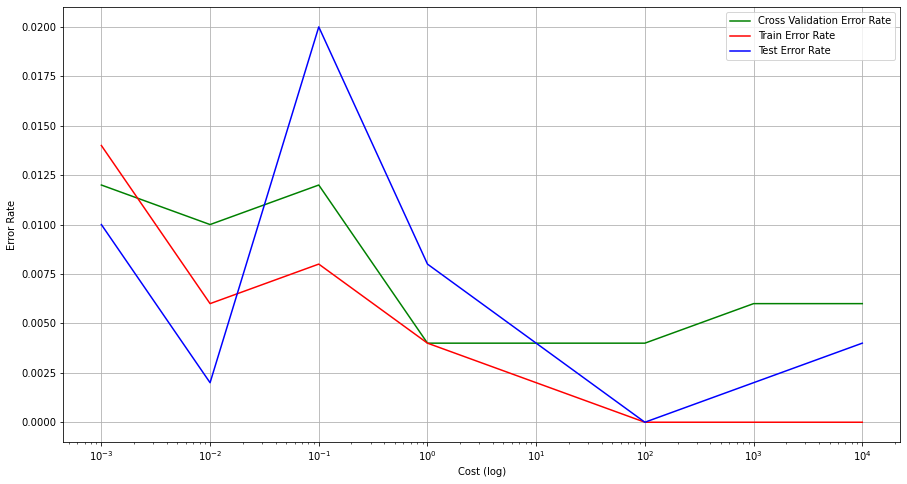

In [20]:
## Create Cross Validation (Training) Error Plot

lists = sorted(cv_error.items())

x, y = zip(*lists)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

ax.set_xscale('log')
plt.plot(x, y, color='g', label="Cross Validation Error Rate")
ax.set_xlabel("Cost (log)")
ax.set_ylabel("Error Rate")


## Create Train Error Plot

lists = sorted(train_error.items())
x, y = zip(*lists)
plt.plot(x, y, color='r', label="Train Error Rate")



## Create Test Error Plot

lists = sorted(test_error.items())
x, y = zip(*lists)
plt.plot(x, y, color='b', label="Test Error Rate")

## Show the Graphs
plt.grid()
plt.legend()
plt.show()